The molecule inserted looks like this:


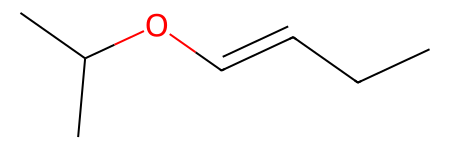

Reactant 1:


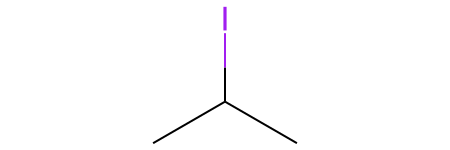

Reactant 2:


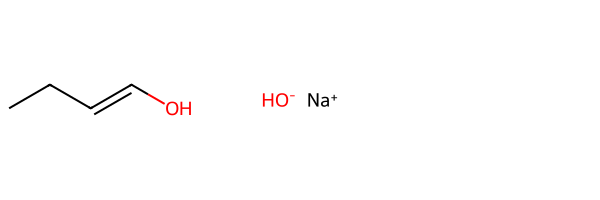

In [7]:
from rdkit import Chem
from itertools import chain
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True


mol_smiles = 'CC(C)OC=CCC'
iodine_smiles = 'I'
sodium_hydroxyde_smiles ='[Na+].[OH-]'
mol=Chem.MolFromSmiles(mol_smiles)
print (f"The molecule inserted looks like this:")
display(mol)
if mol.HasSubstructMatch(Chem.MolFromSmarts('[^3][O]')):
    iodine = Chem.MolFromSmiles(iodine_smiles)
    sodium_hydroxyde = Chem.MolFromSmiles(sodium_hydroxyde_smiles)
    rxn_1 = AllChem.ReactionFromSmarts('[C^3:1][O:2]>>[C:1].[O:2]')
    products = list(chain.from_iterable(rxn_1.RunReactants((mol, ))))
    rxn_2 = AllChem.ReactionFromSmarts('[C:1].[I:2]>>[C:1][I:2]')
    reactant_1 = list(chain.from_iterable(rxn_2.RunReactants((products[0],iodine))))
    reactant_2 = [products[1], sodium_hydroxyde]
    print (f"Reactant 1:")
    display(reactant_1[0])
    print (f"Reactant 2:")
    display(Draw.MolsToGridImage(reactant_2))
else:
    print(f"Molecule has no known disconnections")

In [74]:
from rdkit import Chem
from itertools import chain
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

def amid_disconnection (mol: Chem.rdchem.Mol) ->int:
    
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[^2](=[O])[N][C]')): #Verifies if an amid is present 
        print (f"Amid disconnection available")
        print (f"--------------------------------------")
        amido_radical_smiles = '[N]'
        pyridine_smiles = 'c1ccncc1'
        pyridine = Chem.MolFromSmiles(pyridine_smiles)
        acid_chloride_smile = 'C(=O)Cl'
        amido_radical = Chem.MolFromSmiles(amido_radical_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[N:3].[Cl:4]>>[C^2:1](=[O:2])[Cl:4].[N:3]') #Searches for the amid and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol, amido_radical))) #reactants to make the amid in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form amids
        for r in reactants: #Prints the reactants and the catalyst
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            catalyst = [pyridine]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"pyridine")
            display(Draw.MolsToGridImage(pyridine))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0